In [29]:
import os

os.environ['OMP_NUM_THREADS'] = '24'

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
from mesh2pcf.Mesh2pcfCpp.Mesh2pcfCpp import Mesh2PCF, Mesh2PCFAniso, DoubleVector, DoubleVectorVector, DoubleGrid

In [32]:
mesh = np.load('real_space_field.npy')

In [33]:
mesh_RSD = np.load('redshift_space_field.npy')

In [34]:
type(mesh)

numpy.ndarray

In [35]:
mesh = np.array(mesh, dtype=np.float64)
mesh_RSD = np.array(mesh_RSD, dtype=np.float64)

In [36]:
mesh.shape

(128, 128, 128)

Create the c mesh objects

In [37]:
c_mesh = DoubleGrid(mesh)
c_mesh_RSD = DoubleGrid(mesh_RSD)
# necessary because the C++ code expects a <vector<vector<vector<double>>>>

Create the isotropic 2PCF object

In [38]:
test_2pcf = Mesh2PCF(c_mesh, 1000)

Mesh2PCF object created
Density field size: 128
Box size: 1000
Progress: 1


Run the measurement

In [39]:
test_2pcf.compute_mesh2PCF(
    max_distance=200.0,
    bin_size = 2.5
)
## be sure to raise a warning when relaunching the code
## or to initialize the xi in the C++ code to 0 when called again

Offsets stored. Entering cycle on the 3D mesh...


Create the anisotropic 2PCF object for the real space field

In [40]:
test_2pcf_r_mu = Mesh2PCFAniso(c_mesh, 1000)

Mesh2PCFAniso object created
Density field size: 128
Box size: 1000
Progress: 1


Create the anisotropic 2PCF object for the redshift space field

In [41]:
test_2pcf_rm_mu_RSD = Mesh2PCFAniso(c_mesh_RSD, 1000)

Mesh2PCFAniso object created
Density field size: 128
Box size: 1000
Progress: 1


Run the measurements

In [42]:
test_2pcf_r_mu.compute_mesh2PCF(
    max_distance = 200.0,
    bin_size = 5.0,
    num_mu_bins = 200
)

Creating separation arrays
Counts and products initialized. Shape is 41x200
Offsets stored. Entering cycle on the 3D mesh...
Computing normalization factor)))) seconds)7 seconds)9 seconds)32.0521% completed (13 seconds)19 seconds)25 seconds)28 seconds) seconds)% completed (35 seconds)36 seconds) seconds)
Computing multipoles
Mesh2PCFAniso computation completed


In [43]:
test_2pcf_rm_mu_RSD.compute_mesh2PCF(
    max_distance=200.0,
    bin_size = 5.0,
    num_mu_bins = 200
)

Creating separation arrays
Counts and products initialized. Shape is 41x200
Offsets stored. Entering cycle on the 3D mesh...
Computing normalization factor))))2 seconds)4 seconds) seconds)8 seconds)9 seconds)11 seconds)20 seconds)
Computing multipoles
Mesh2PCFAniso computation completed


Get the multipoles and the separation binnings

In [44]:
#real space
xi0_r_mu_128 = test_2pcf_r_mu.get_monopole()
xi0_r_mu_128 = np.array(xi0_r_mu_128)

xi2_r_mu_128 = test_2pcf_r_mu.get_quadrupole()
xi2_r_mu_128 = np.array(xi2_r_mu_128)

xi4_r_mu_128 = test_2pcf_r_mu.get_hexadecapole()
xi4_r_mu_128 = np.array(xi4_r_mu_128)

#redshift space
xi0_r_mu_128_RSD = test_2pcf_rm_mu_RSD.get_monopole()
xi0_r_mu_128_RSD = np.array(xi0_r_mu_128_RSD)

xi2_r_mu_128_RSD = test_2pcf_rm_mu_RSD.get_quadrupole()
xi2_r_mu_128_RSD = np.array(xi2_r_mu_128_RSD)

xi4_r_mu_128_RSD = test_2pcf_rm_mu_RSD.get_hexadecapole()
xi4_r_mu_128_RSD = np.array(xi4_r_mu_128_RSD)

In [45]:
r = test_2pcf_r_mu.get_r_array()
r = np.array(r)

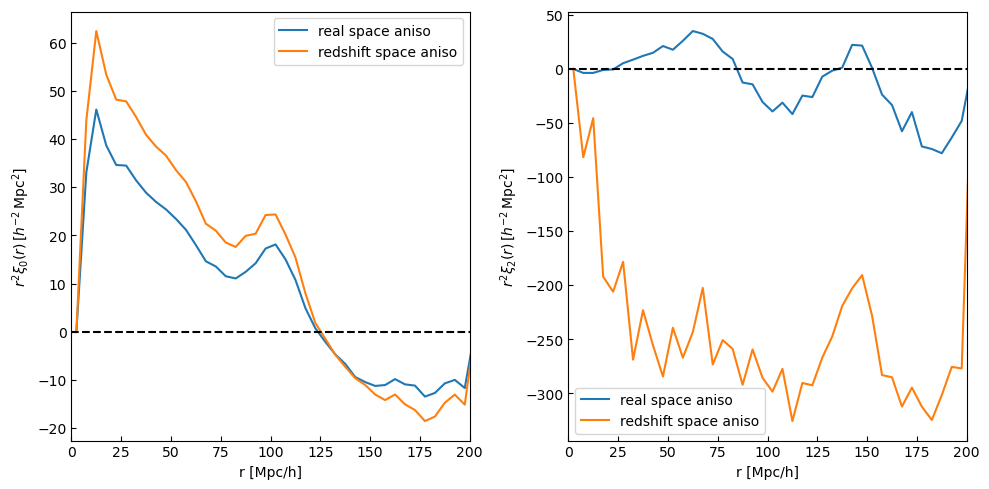

In [49]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
ax0.plot(r, r**2*xi0_r_mu_128, label='real space aniso')
ax0.plot(r, r**2*xi0_r_mu_128_RSD, label='redshift space aniso')

ax1.plot(r, 5*r**2*xi2_r_mu_128, label='real space aniso')
ax1.plot(r, 5*r**2*xi2_r_mu_128_RSD, label='redshift space aniso')

for ax in (ax0, ax1):
    ax.legend()
    ax.set_xlabel('r [Mpc/h]')
    ax.set_xlim(0, 200)
    ax.axhline(0, color='k', linestyle='--')
    ax.tick_params(which='both', direction='in', top=False, right=False)

ax0.set_ylabel(r'$r^2\xi_0(r)\, [h^{-2}\,\mathrm{Mpc}^{2}]$')
ax1.set_ylabel(r'$r^2\xi_2(r)\, [h^{-2}\,\mathrm{Mpc}^{2}]$')
plt.tight_layout()